In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('/content/cars24fullclean.csv')

In [48]:
df

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
0,0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Zero downpayment,Hyderabad,Telangana
1,1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Zero downpayment,Hyderabad,Telangana
2,2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Zero downpayment,Hyderabad,Telangana
3,3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Zero downpayment,Hyderabad,Telangana
4,4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Zero downpayment,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,4485,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Zero downpayment,Pune,Maharashtra
4486,4486,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Zero downpayment,Pune,Maharashtra
4487,4487,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Zero downpayment,Pune,Maharashtra
4488,4488,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Zero downpayment,Pune,Maharashtra


In [49]:
print(df.head())
print("\n")
print(df.tail())
print("\n")
print(df.shape)

   Unnamed: 0           cars_name cars_brand                  model  \
0           0       Ford Ecosport       Ford  1.5 TITANIUMTDCI OPT    
1           1        Maruti Swift     Maruti                   ZDI    
2           2       Honda Mobilio      Honda      1.5 V OPT I DTEC    
3           3  Maruti Wagon R 1.0     Maruti                   VXI    
4           4  Hyundai i20 Active    Hyundai                 1.2 S    

   model_year car_type     kms  owner gasoliene_type   price  emi_per_month  \
0        2013   Manual  179045      1         Diesel  507599          11291   
1        2012   Manual   78819      2         Diesel  476699          10604   
2        2014   Manual   97289      2         Diesel  494799          11007   
3        2013   Manual   45693      2         Petrol  331999           7385   
4        2016   Manual   40586      1         Petrol  620299          13798   

   zero_downpayment       city      state  
0  Zero downpayment  Hyderabad  Telangana  
1  Zero do

In [50]:
df.info

<bound method DataFrame.info of       Unnamed: 0           cars_name cars_brand                   model  \
0              0       Ford Ecosport       Ford   1.5 TITANIUMTDCI OPT    
1              1        Maruti Swift     Maruti                    ZDI    
2              2       Honda Mobilio      Honda       1.5 V OPT I DTEC    
3              3  Maruti Wagon R 1.0     Maruti                    VXI    
4              4  Hyundai i20 Active    Hyundai                  1.2 S    
...          ...                 ...        ...                     ...   
4485        4485        Maruti Swift     Maruti                    VDI    
4486        4486         Maruti Eeco     Maruti  5 STR WITH AC PLUSHTR    
4487        4487     Maruti Alto 800     Maruti                    LXI    
4488        4488     Maruti Alto K10     Maruti            LXI CNG (O)    
4489        4489     Maruti Alto 800     Maruti                    VXI    

      model_year car_type     kms  owner gasoliene_type   price  \


In [51]:
df.mean()

Unnamed: 0         2244.500000
model_year         2016.516481
kms               45227.062361
owner                 1.228285
price            326964.484410
emi_per_month      6972.457238
dtype: float64

In [52]:
df.describe(include='all')

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
count,4490.000000,4490,4490,4490,4490.000000,4490,4490.000000,4490.000000,4490,4.490000e+03,4490.000000,4490,4490,4490
unique,NaN,132,25,642,NaN,2,NaN,NaN,2,NaN,NaN,1,10,8
top,NaN,Hyundai Grand i10,Maruti,VXI,NaN,Manual,NaN,NaN,Petrol,NaN,NaN,Zero downpayment,Gurgaon,Maharashtra
freq,NaN,314,2208,558,NaN,3789,NaN,NaN,3289,NaN,NaN,4490,831,1305
mean,2244.500000,NaN,NaN,NaN,2016.516481,NaN,45227.062361,1.228285,NaN,3.269645e+05,6972.457238,NaN,NaN,NaN
std,1296.295684,NaN,NaN,NaN,2.281839,NaN,33100.553227,0.482024,NaN,3.498120e+05,8011.797982,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1997.000000,NaN,58.000000,1.000000,NaN,0.000000e+00,0.000000,NaN,NaN,NaN
25%,1122.250000,NaN,NaN,NaN,2015.000000,NaN,21563.250000,1.000000,NaN,4.879900e+04,505.250000,NaN,NaN,NaN
50%,2244.500000,NaN,NaN,NaN,2017.000000,NaN,38188.000000,1.000000,NaN,2.226490e+05,4952.500000,NaN,NaN,NaN
75%,3366.750000,NaN,NaN,NaN,2018.000000,NaN,60620.250000,1.000000,NaN,5.326740e+05,11849.000000,NaN,NaN,NaN


In [53]:
df.value_counts()

Unnamed: 0  cars_name           cars_brand  model                   model_year  car_type   kms     owner  gasoliene_type  price   emi_per_month  zero_downpayment  city       state      
0           Ford Ecosport       Ford        1.5 TITANIUMTDCI OPT    2013        Manual     179045  1      Diesel          507599  11291          Zero downpayment  Hyderabad  Telangana      1
2990        Maruti Swift Dzire  Maruti      VXI 1.2 BS IV           2015        Manual     126168  1      Petrol          432499  9621           Zero downpayment  Kolkata    West Bengal    1
2996        Maruti Swift        Maruti      ZXI                     2014        Manual     46387   2      Petrol          413699  9203           Zero downpayment  Kolkata    West Bengal    1
2995        Hyundai NEW SANTRO  Hyundai     SPORTZ 1.1              2018        Manual     13668   2      Petrol          465899  10364          Zero downpayment  Kolkata    West Bengal    1
2994        Honda Jazz          Honda       1.2 SV

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4490 non-null   int64 
 1   cars_name         4490 non-null   object
 2   cars_brand        4490 non-null   object
 3   model             4490 non-null   object
 4   model_year        4490 non-null   int64 
 5   car_type          4490 non-null   object
 6   kms               4490 non-null   int64 
 7   owner             4490 non-null   int64 
 8   gasoliene_type    4490 non-null   object
 9   price             4490 non-null   int64 
 10  emi_per_month     4490 non-null   int64 
 11  zero_downpayment  4490 non-null   object
 12  city              4490 non-null   object
 13  state             4490 non-null   object
dtypes: int64(6), object(8)
memory usage: 491.2+ KB


In [55]:
df.corr()

,Unnamed: 0,model_year,kms,owner,price,emi_per_month
Unnamed: 0,1.000000,-0.063220,-0.069272,-0.056382,-0.098611,-0.103054
model_year,-0.063220,1.000000,-0.477951,-0.236031,0.156316,0.148810
kms,-0.069272,-0.477951,1.000000,0.067202,-0.108948,-0.108489
owner,-0.056382,-0.236031,0.067202,1.000000,-0.020694,-0.018972
price,-0.098611,0.156316,-0.108948,-0.020694,1.000000,0.997771
emi_per_month,-0.103054,0.148810,-0.108489,-0.018972,0.997771,1.000000


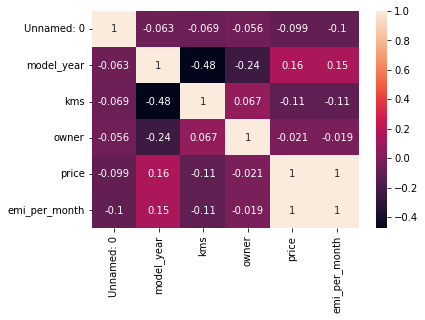

In [13]:
sns.heatmap(df.corr(),annot = True)

In [56]:
df.isnull().any()

Unnamed: 0          False
cars_name           False
cars_brand          False
model               False
model_year          False
car_type            False
kms                 False
owner               False
gasoliene_type      False
price               False
emi_per_month       False
zero_downpayment    False
city                False
state               False
dtype: bool

In [58]:
df.drop_duplicates()

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
0,0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Zero downpayment,Hyderabad,Telangana
1,1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Zero downpayment,Hyderabad,Telangana
2,2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Zero downpayment,Hyderabad,Telangana
3,3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Zero downpayment,Hyderabad,Telangana
4,4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Zero downpayment,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,4485,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Zero downpayment,Pune,Maharashtra
4486,4486,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Zero downpayment,Pune,Maharashtra
4487,4487,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Zero downpayment,Pune,Maharashtra
4488,4488,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Zero downpayment,Pune,Maharashtra


Visualization

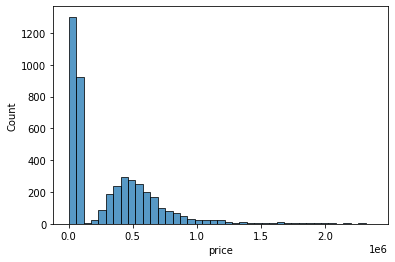

In [72]:
sns.histplot(df['price'])

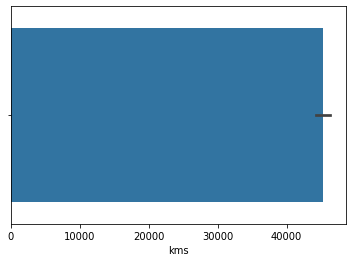

In [73]:
sns.barplot(df['kms'])

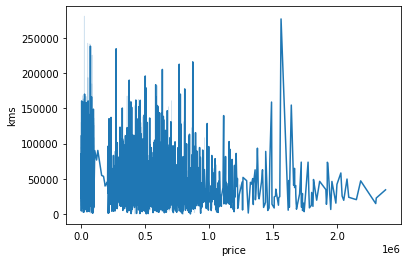

In [74]:
sns.lineplot(df['price'],df['kms'])

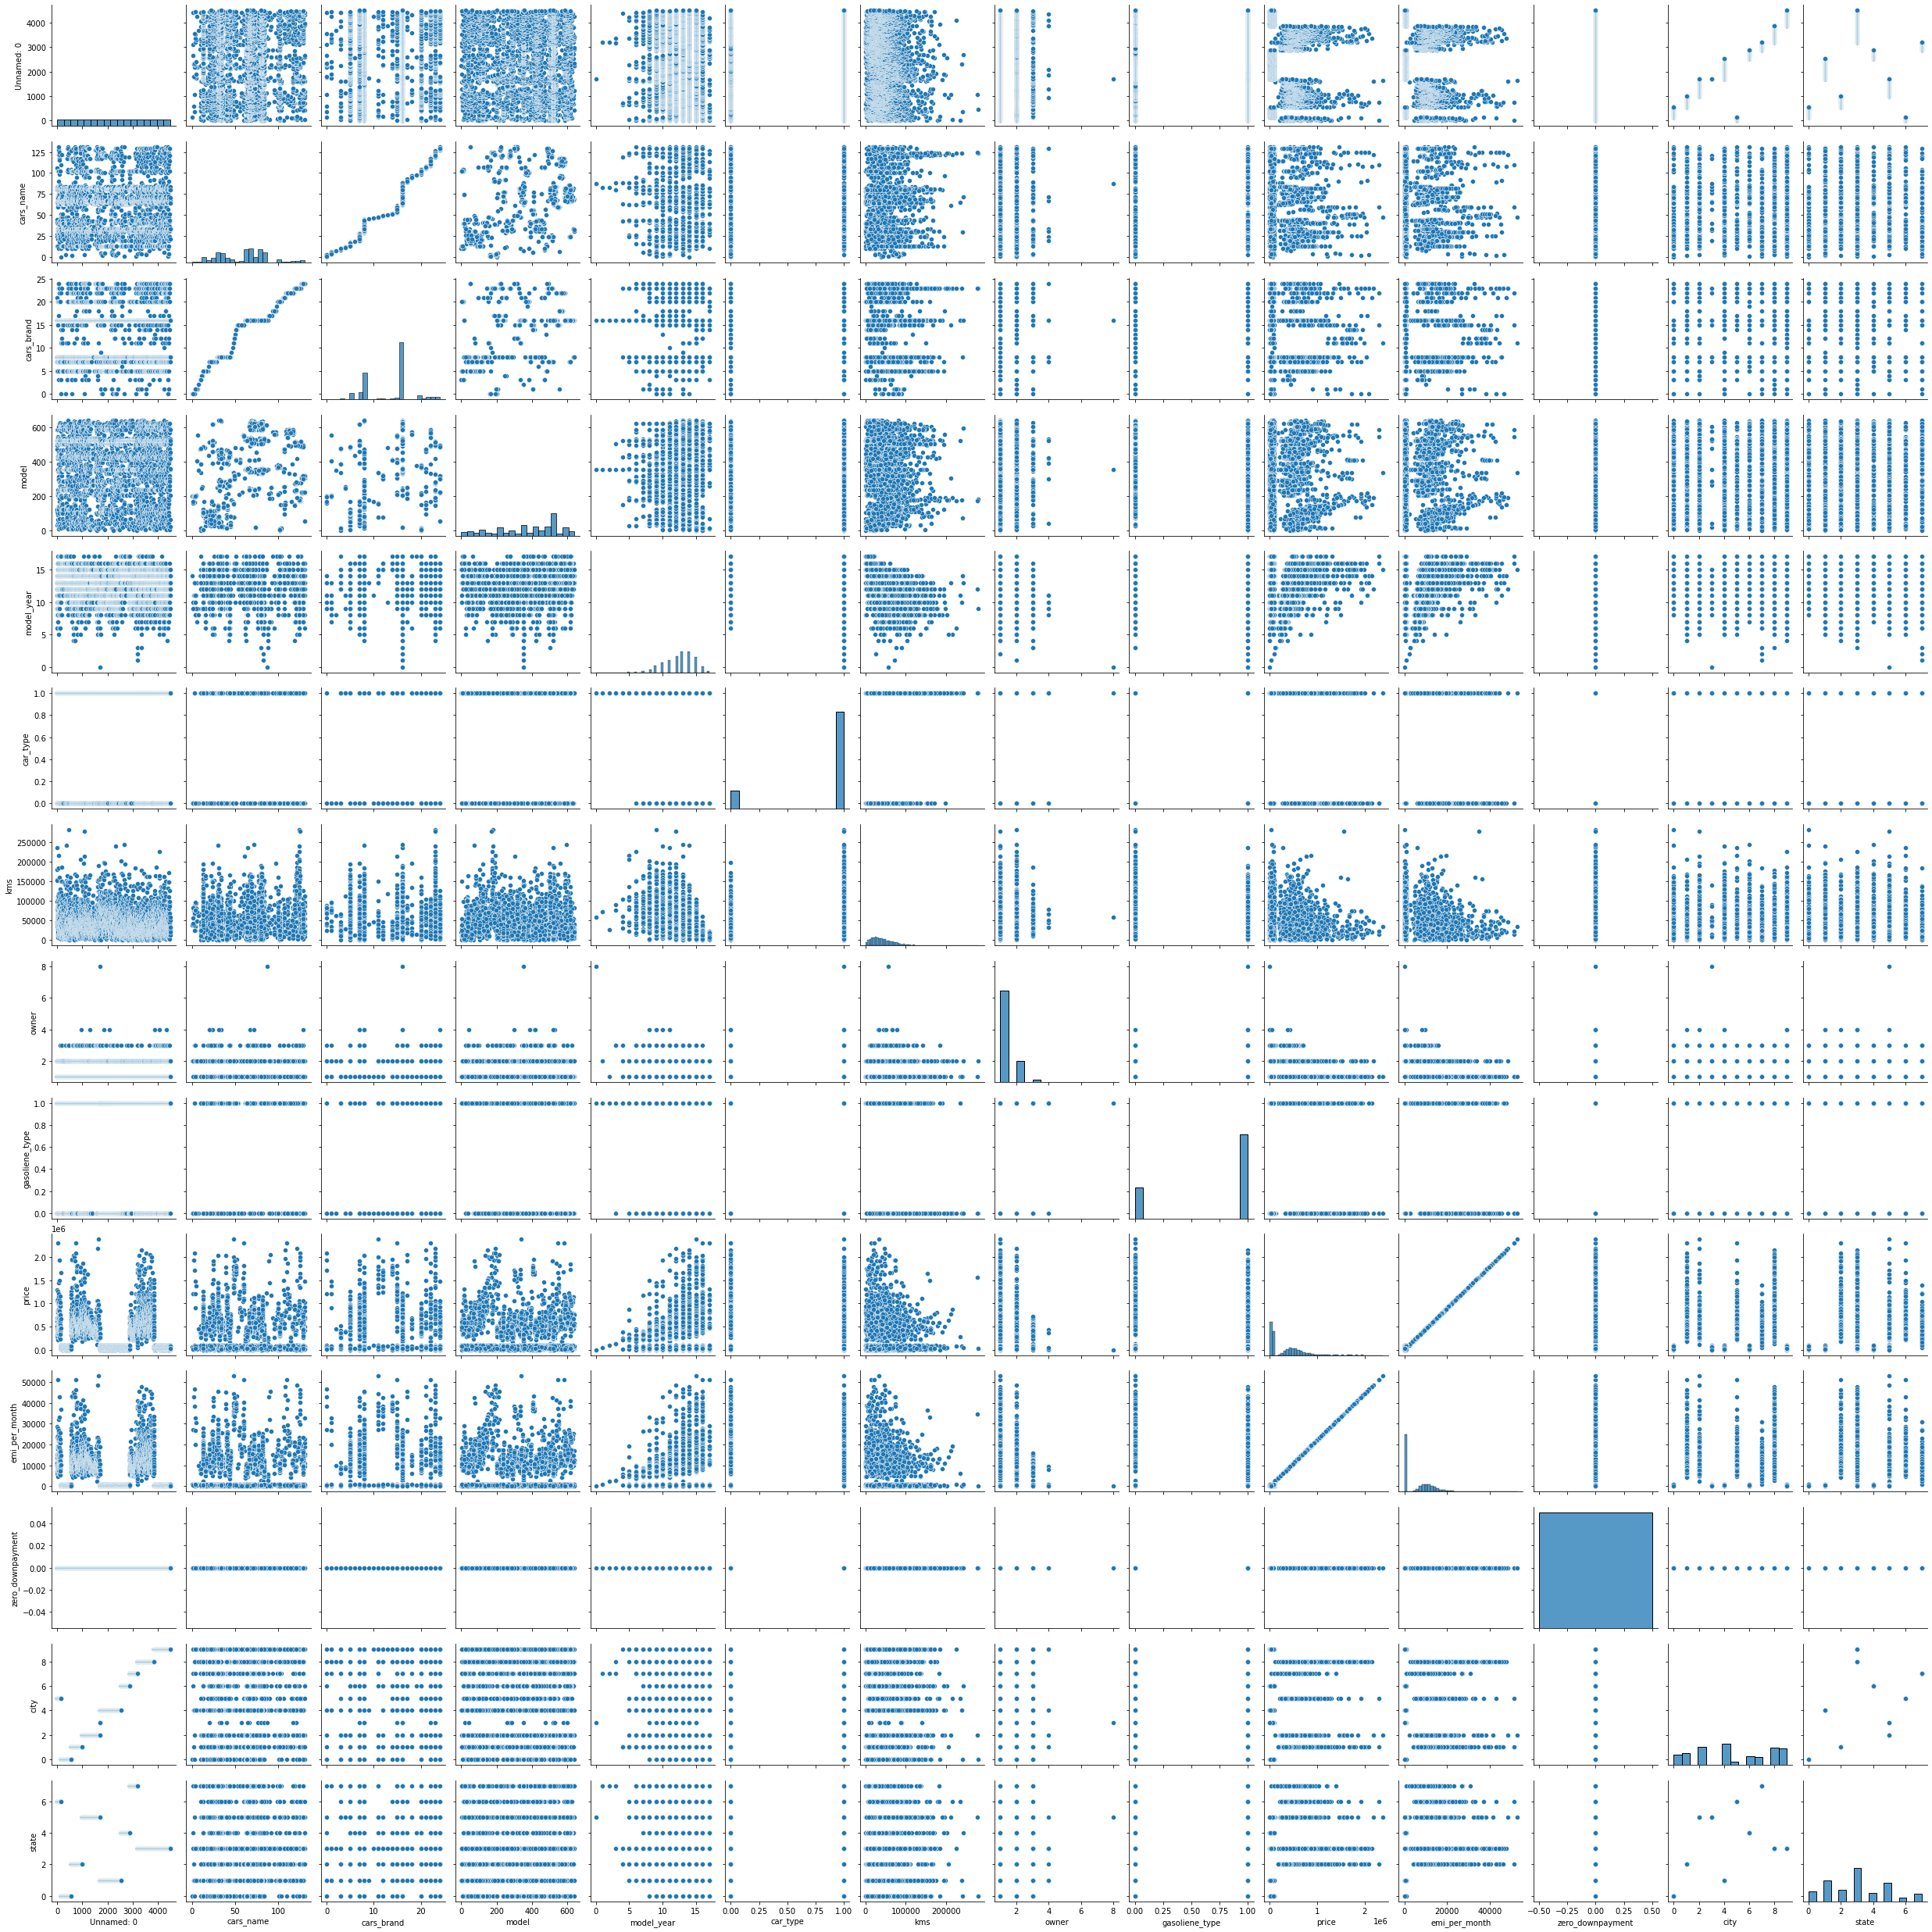

In [75]:
sns.pairplot(df)

Outlier

In [76]:
quant = df.quantile(q = [0.75,0.25])
print('quant: ',quant)
print("\n")

iqr = quant.iloc[0] = quant.iloc[1]
print('iqr: ',iqr)
print("\n")

u = quant.iloc[0] + (1.5*iqr)
print('u: ',u)
print("\n")

l = quant.iloc[1] + (1.5*iqr)
print('l: ',l)

quant:        Unnamed: 0  cars_name  cars_brand  model  model_year  car_type  \
0.75     3366.75       80.0        16.0  521.0        14.0       1.0   
0.25     1122.25       34.0         8.0  235.0        11.0       1.0   

           kms  owner  gasoliene_type     price  emi_per_month  \
0.75  60620.25    1.0             1.0  532674.0       11849.00   
0.25  21563.25    1.0             0.0   48799.0         505.25   

      zero_downpayment  city  state  
0.75               0.0   8.0    5.0  
0.25               0.0   2.0    1.0  


iqr:  Unnamed: 0           1122.25
cars_name              34.00
cars_brand              8.00
model                 235.00
model_year             11.00
car_type                1.00
kms                 21563.25
owner                   1.00
gasoliene_type          0.00
price               48799.00
emi_per_month         505.25
zero_downpayment        0.00
city                    2.00
state                   1.00
Name: 0.25, dtype: float64


u:  Unnamed: 0     

Splitting into dependent and independent variable

In [77]:
x = df.drop(columns='price')
x = x.drop(columns='Unnamed: 0')
x

,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,emi_per_month,zero_downpayment,city,state
0,13,5,105,9,1,179045,1,0,11291,0,5,6
1,80,16,586,8,1,78819,2,0,10604,0,5,6
2,27,7,111,10,1,97289,2,0,11007,0,5,6
3,84,16,521,9,1,45693,2,1,7385,0,5,6
4,45,8,33,12,1,40586,1,1,13798,0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4485,80,16,501,9,1,35212,1,0,627,0,9,3
4486,71,16,203,14,1,23573,1,1,507,0,9,3
4487,64,16,353,14,1,33004,1,1,889,0,9,3
4488,65,16,356,15,1,57875,1,1,594,0,9,3


In [78]:
y = df['price']
y

0       507599
1       476699
2       494799
3       331999
4       620299
         ...  
4485     32799
4486     27399
4487      9699
4488     31299
4489     23199
Name: price, Length: 4490, dtype: int64

Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [80]:
x_train_stand = MinMaxScaler(feature_range=(0,1)).fit_transform(x_train)
x_train_stand

array([[0.49618321, 0.66666667, 0.81591264, ..., 0.        , 0.22222222,
        0.71428571],
       [0.61068702, 0.66666667, 0.82683307, ..., 0.        , 0.66666667,
        0.57142857],
       [0.61068702, 0.66666667, 0.78159126, ..., 0.        , 0.44444444,
        0.14285714],
       ...,
       [0.98473282, 1.        , 0.46333853, ..., 0.        , 0.11111111,
        0.28571429],
       [0.6259542 , 0.66666667, 0.78159126, ..., 0.        , 1.        ,
        0.42857143],
       [0.6259542 , 0.66666667, 0.78939158, ..., 0.        , 0.        ,
        0.        ]])

In [81]:
x_test_stand = MinMaxScaler(feature_range=(0,1)).fit_transform(x_test)
x_test_stand

array([[0.98412698, 1.        , 0.4625    , ..., 0.        , 1.        ,
        0.42857143],
       [0.48412698, 0.65217391, 0.36875   , ..., 0.        , 1.        ,
        0.42857143],
       [0.49206349, 0.65217391, 0.8265625 , ..., 0.        , 0.55555556,
        0.85714286],
       ...,
       [0.75396825, 0.82608696, 0.328125  , ..., 0.        , 0.44444444,
        0.14285714],
       [0.23015873, 0.30434783, 0.6484375 , ..., 0.        , 0.44444444,
        0.14285714],
       [0.49206349, 0.65217391, 0.978125  , ..., 0.        , 0.44444444,
        0.14285714]])

In [82]:
print(x_train_stand.shape)
print(x_test_stand.shape)

(3592, 12)
(898, 12)


In [83]:
print(y_train.shape)
print(y_test.shape)

(3592,)
(898,)


Model Evaluation

Multiple Linear Regression

<Figure size 432x288 with 0 Axes>

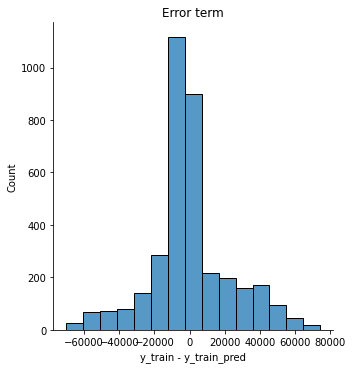

MSE:  764586508.8138309
RMSE:  27651.157458844846
train_r2_score:  0.995760735271376
test_r2_score:  0.9939785628267823


In [84]:
mlr = LinearRegression()
mlr.fit(x_train_stand,y_train)
y_train_pred = mlr.predict(x_train_stand)
y_test_pred = mlr.predict(x_test_stand)
fig = plt.figure()
res = (y_train-y_train_pred)
sns.displot(res,bins=15)
plt.title("Error term")
plt.xlabel('y_train - y_train_pred')
plt.show()

mse_mlr = metrics.mean_squared_error(y_test,y_test_pred)
rmse_mlr = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_mlr)
print('RMSE: ',rmse_mlr)

r2_train_mlr = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_mlr)
r2_test_mlr = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_mlr)

Ridge regression

In [85]:
regressor_ridge = Ridge()
regressor_ridge.fit(x_train_stand,y_train)
y_train_pred = regressor_ridge.predict(x_train_stand)
y_test_pred = regressor_ridge.predict(x_test_stand)

mse_ridge = metrics.mean_squared_error(y_test,y_test_pred)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_ridge)
print('RMSE: ',rmse_ridge)

r2_train_ridge = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_ridge)
r2_test_ridge = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_ridge)

MSE:  676161358.1209401
RMSE:  26003.10285563898
train_r2_score:  0.9955679516508642
test_r2_score:  0.9946749477136352


Lasso Regression

In [86]:
regressor_lasso = Lasso()
regressor_lasso.fit(x_train_stand,y_train)
y_train_pred = regressor_lasso.predict(x_train_stand)
y_test_pred = regressor_lasso.predict(x_test_stand)

mse_lasso = metrics.mean_squared_error(y_test,y_test_pred)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_lasso)
print('RMSE: ',rmse_lasso)

r2_train_lasso = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_lasso)
r2_test_lasso = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_lasso)

MSE:  763990939.1294098
RMSE:  27640.386016288012
train_r2_score:  0.9957607292037959
test_r2_score:  0.9939832531860755


Decision Tree

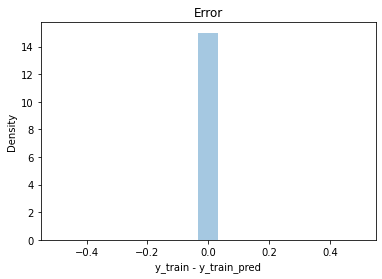

MSE:  1052165341.357461
RMSE:  32437.098226528542
train_r2_score:  1.0
test_r2_score:  0.9917137597566952


In [87]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(x_train_stand,y_train)
y_train_pred = regressor_dt.predict(x_train_stand)
y_test_pred = regressor_dt.predict(x_test_stand)

fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 15)
plt.title('Error')
plt.xlabel('y_train - y_train_pred')
plt.show()

mse_dt = metrics.mean_squared_error(y_test,y_test_pred)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_dt)
print('RMSE: ',rmse_dt)

r2_train_dt = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_dt)
r2_test_dt = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_dt)

Support vector Machine

In [88]:
regressor_svm = SVR()
regressor_svm.fit(x_train_stand,y_train)
y_train_pred = regressor_svm.predict(x_train_stand)
y_test_pred = regressor_svm.predict(x_test_stand)

mse_svm = metrics.mean_squared_error(y_test,y_test_pred)
rmse_svm = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_svm)
print('RMSE: ',rmse_svm)

r2_train_svm = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_svm)
r2_test_svm = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_svm)

MSE:  138453758451.64325
RMSE:  372093.74954659375
train_r2_score:  -0.08957071014821794
test_r2_score:  -0.090381007645298


Random Forest

In [89]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train_stand,y_train)
y_train_pred = regressor_rf.predict(x_train_stand)
y_test_pred = regressor_rf.predict(x_test_stand)

mse_rf = metrics.mean_squared_error(y_test,y_test_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_rf)
print('RMSE: ',rmse_rf)

r2_train_rf = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_rf)
r2_test_rf = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_rf)

MSE:  686877704.3530186
RMSE:  26208.351805350496
train_r2_score:  0.999527002210973
test_r2_score:  0.9945905520241756


Xg Boost

In [90]:
regressor_xg = XGBRegressor()
regressor_xg.fit(x_train_stand,y_train)
y_train_pred = regressor_xg.predict(x_train_stand)
y_test_pred = regressor_xg.predict(x_test_stand)

mse_xg = metrics.mean_squared_error(y_test,y_test_pred)
rmse_xg = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_xg)
print('RMSE: ',rmse_xg)

r2_train_xg = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_xg)
r2_test_xg = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_xg)

[18:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  692399381.7262977
RMSE:  26313.482888555398
train_r2_score:  0.996807347144019
test_r2_score:  0.9945470665153276
